In [24]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Download preprocessed data
from src.data.vol.get_atm_vol_surface import get_atm_vol_surface
data, uniq_opt_tenors, uniq_swap_tenors = get_atm_vol_surface()

# Normalize data
from src.data.vol.normalizer import Normalizer
normalizer = Normalizer()
data_norm = normalizer.normalize(data)

### Create and train the model

In [25]:
# Create VAE and fit it
from src.models.vae_vanilla import VaeVanilla
vae = VaeVanilla(input_shape=data_norm.shape[1:],
                 hidden_layers_nodes=[192, 96, 48, 24, 12, 6],
                 latent_space_dim=1,
                 loss_type='mse',
                 beta=0.01)
vae.compile(optimizer='adam')
history = vae.fit(data_norm, 
                  epochs=55, 
                  batch_size=16)  # add validation_data=x_test

Epoch 1/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 2.1576e-04 - reconstruction_loss: 14.9335 - total_loss: 14.9334
Epoch 2/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 5.9030e-05 - reconstruction_loss: 11.6454 - total_loss: 11.6452
Epoch 3/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 1.2500e-04 - reconstruction_loss: 11.6431 - total_loss: 11.6430
Epoch 4/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 1.5290e-04 - reconstruction_loss: 11.6353 - total_loss: 11.6352
Epoch 5/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0175 - reconstruction_loss: 11.3975 - total_loss: 11.4148
Epoch 6/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0290 - reconstruction_loss: 11.1135 - total_loss: 11.1423
Epoch 7/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0246 - reconstruction_loss: 11.0978 - total_loss: 11.1222
Epoch 8/55
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - kl_loss: 0.0246 - reconstruction_loss: 11.0936 - total_loss: 11.1180


### Plot history of losses

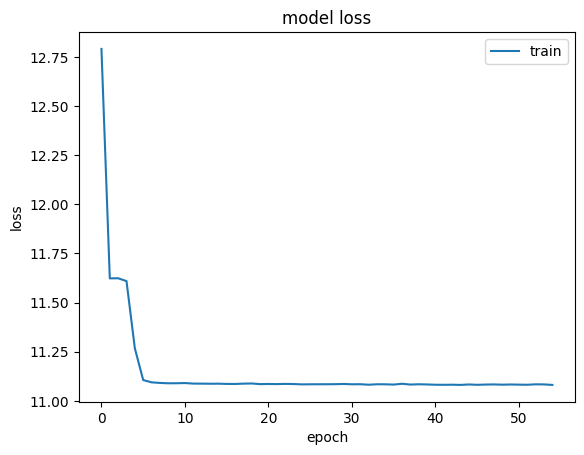

In [26]:
from src.visualization.plot_history_of_losses import plot_history_of_losses
plot_history_of_losses(history)

### Plot 1d distribution of latent space values

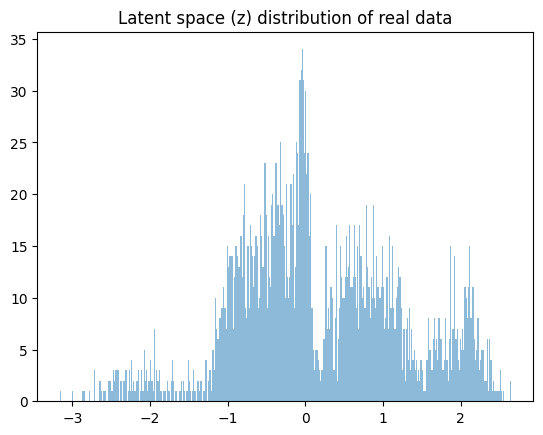

In [27]:
from src.visualization.plot_latent_space_1d_values import plot_latent_space_1d_values
plot_latent_space_1d_values(vae, 
                            data_norm,
                            vae_latent_type='z')

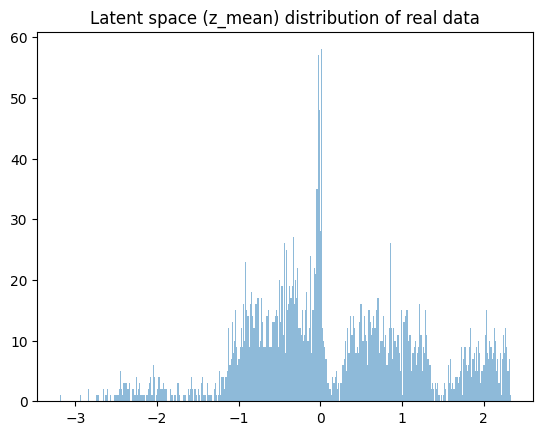

In [28]:
plot_latent_space_1d_values(vae, 
                            data_norm,
                            vae_latent_type='z_mean')

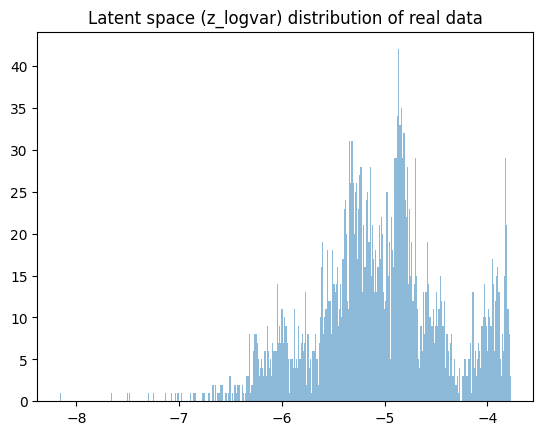

In [29]:
plot_latent_space_1d_values(vae, 
                            data_norm,
                            vae_latent_type='z_logvar')

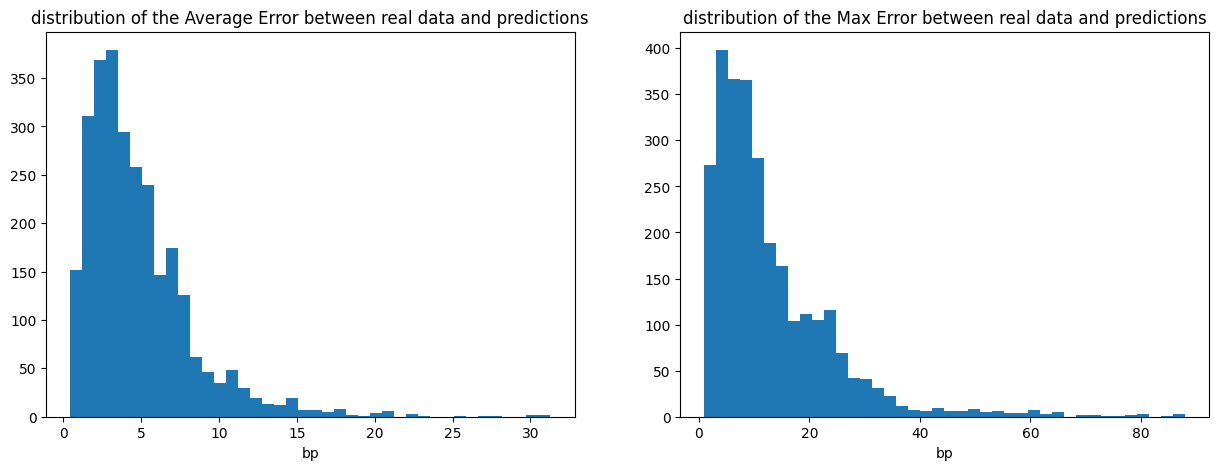

In [30]:
from src.visualization.vol.error_histograms import error_histograms
error_histograms(vae,
                data,
                normalizer)

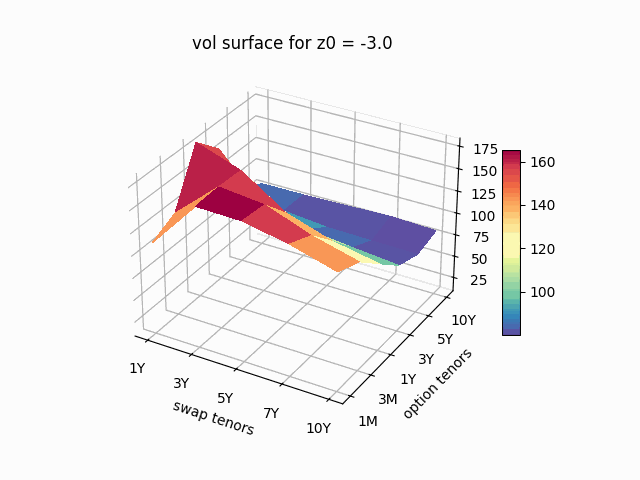

In [31]:
from src.visualization.vol.plot_surface_for_diff_z import plot_surface_for_diff_z

plot_surface_for_diff_z(vae,
                        normalizer,
                        all_z_vals=[0],
                        z_idx=0,
                        x_labels=uniq_swap_tenors,
                        y_labels=uniq_opt_tenors,
                        name='1lat_z0',
                        fps=3)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


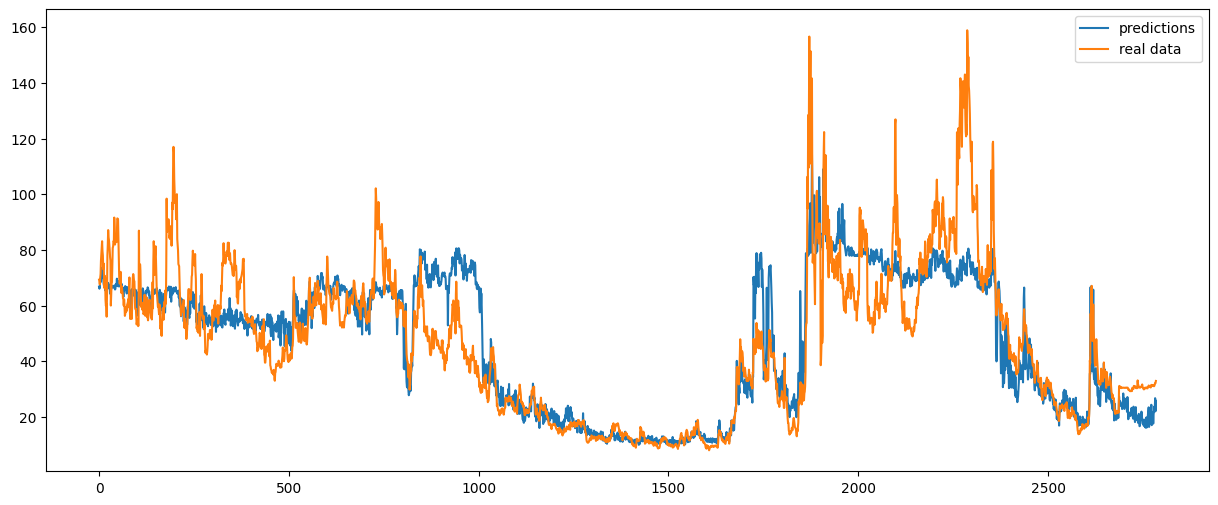

In [38]:
import matplotlib.pyplot as plt
N1 = 0  # indexes of data dimension
N2 = 0  # indexes of data dimension

predictions = normalizer.denormalize(vae.predict(x=data_norm))
plt.figure(figsize=(15,6))
plt.plot(predictions[:, N1, N2], label='predictions')
plt.plot(data[:, N1, N2], label='real data')
plt.legend()
plt.show()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


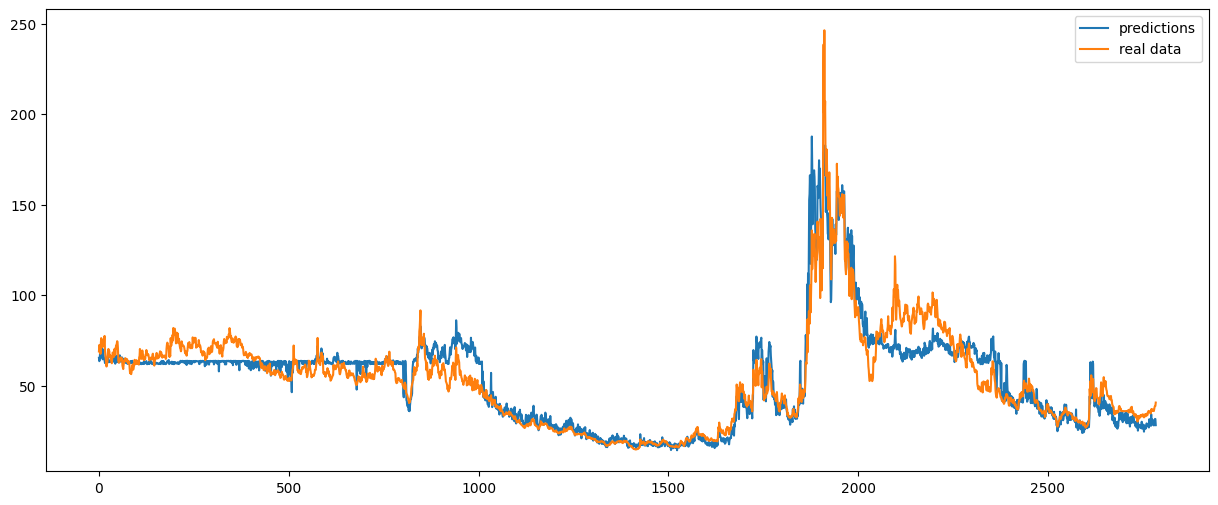

In [37]:
# HIGHEST VOL
import matplotlib.pyplot as plt
N1 = 2  # indexes of data dimension
N2 = 0  # indexes of data dimension

predictions = normalizer.denormalize(vae.predict(x=data_norm))
plt.figure(figsize=(15,6))
plt.plot(predictions[:, N1, N2], label='predictions')
plt.plot(data[:, N1, N2], label='real data')
plt.legend()
plt.show()

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


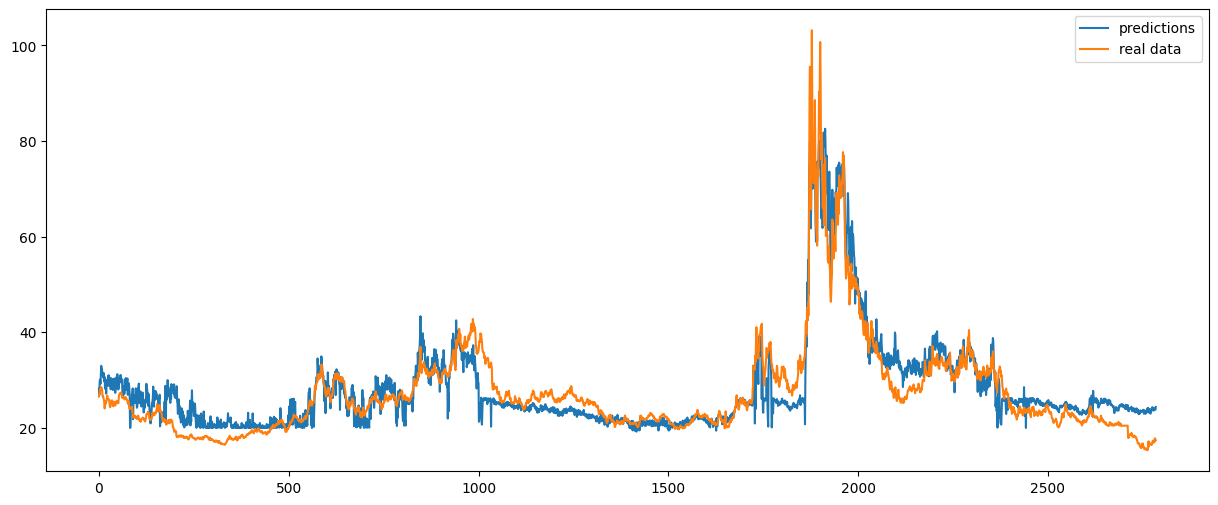

In [39]:
import matplotlib.pyplot as plt
N1 = 5  # indexes of data dimension
N2 = 4  # indexes of data dimension

predictions = normalizer.denormalize(vae.predict(x=data_norm))
plt.figure(figsize=(15,6))
plt.plot(predictions[:, N1, N2], label='predictions')
plt.plot(data[:, N1, N2], label='real data')
plt.legend()
plt.show()